<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [32]:
нормальное - RM и MEDV
равномерное - нет
биноминальное - CHAS RAD
Бернулли - нет
Геометрическое - CRIM ZN B
Логнормальное - NOX LSTAT
экспоненциальное - AGE DIS PTRATIO

1

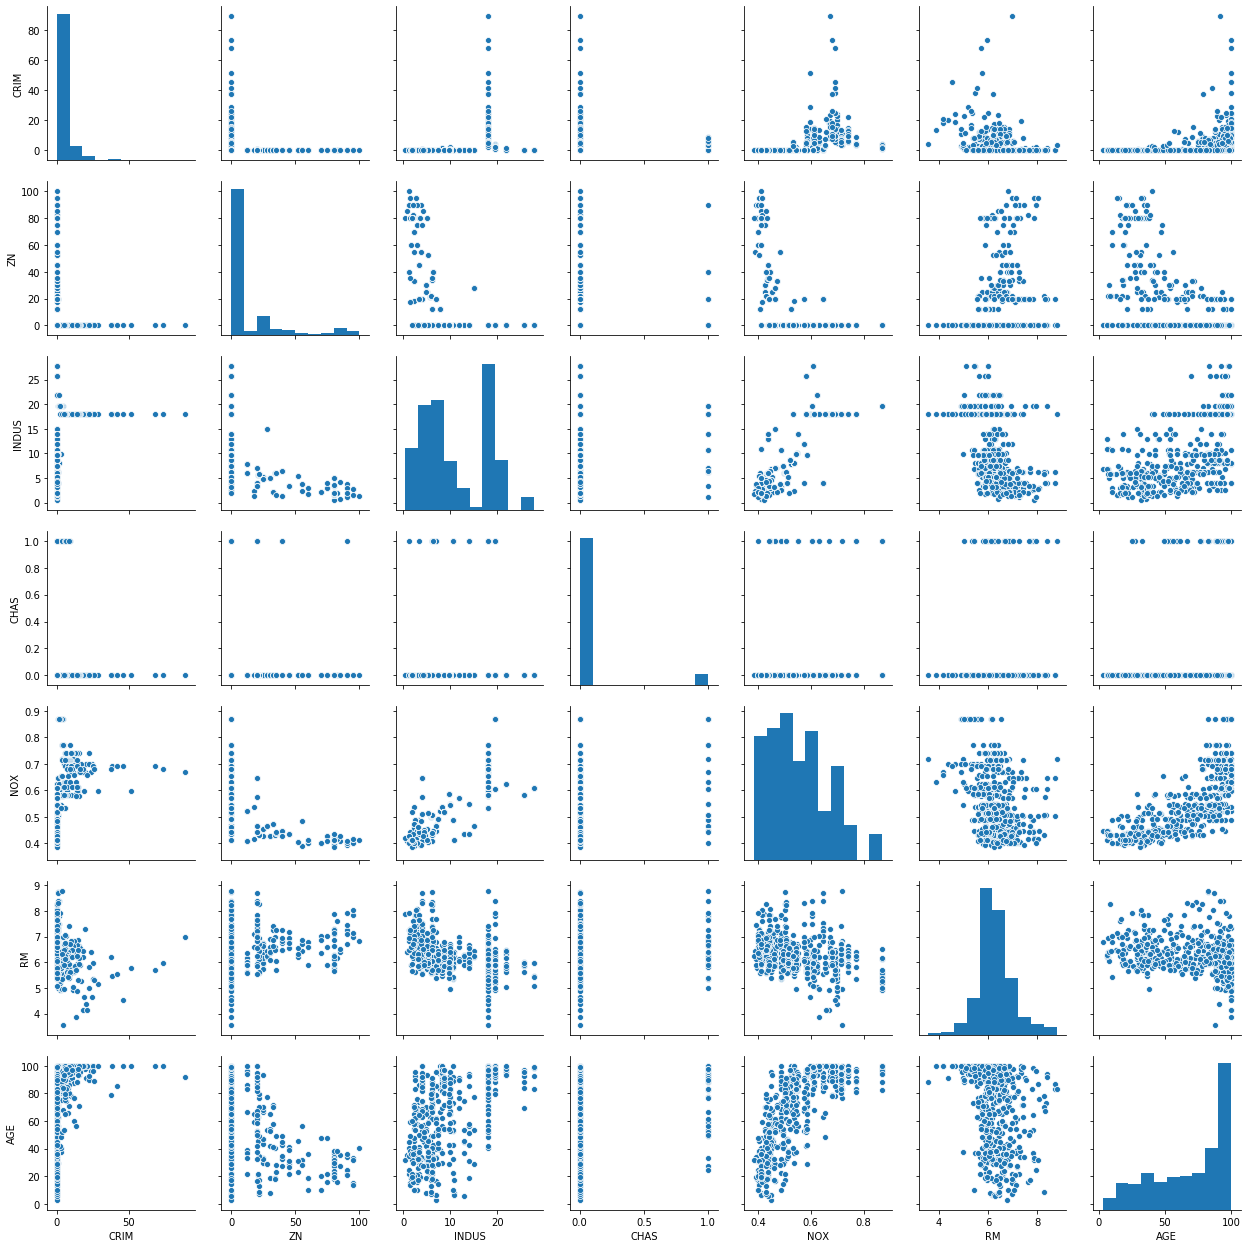

In [29]:
#здесь интересуют только гистограммы
sns.pairplot(data.iloc[:,:7])

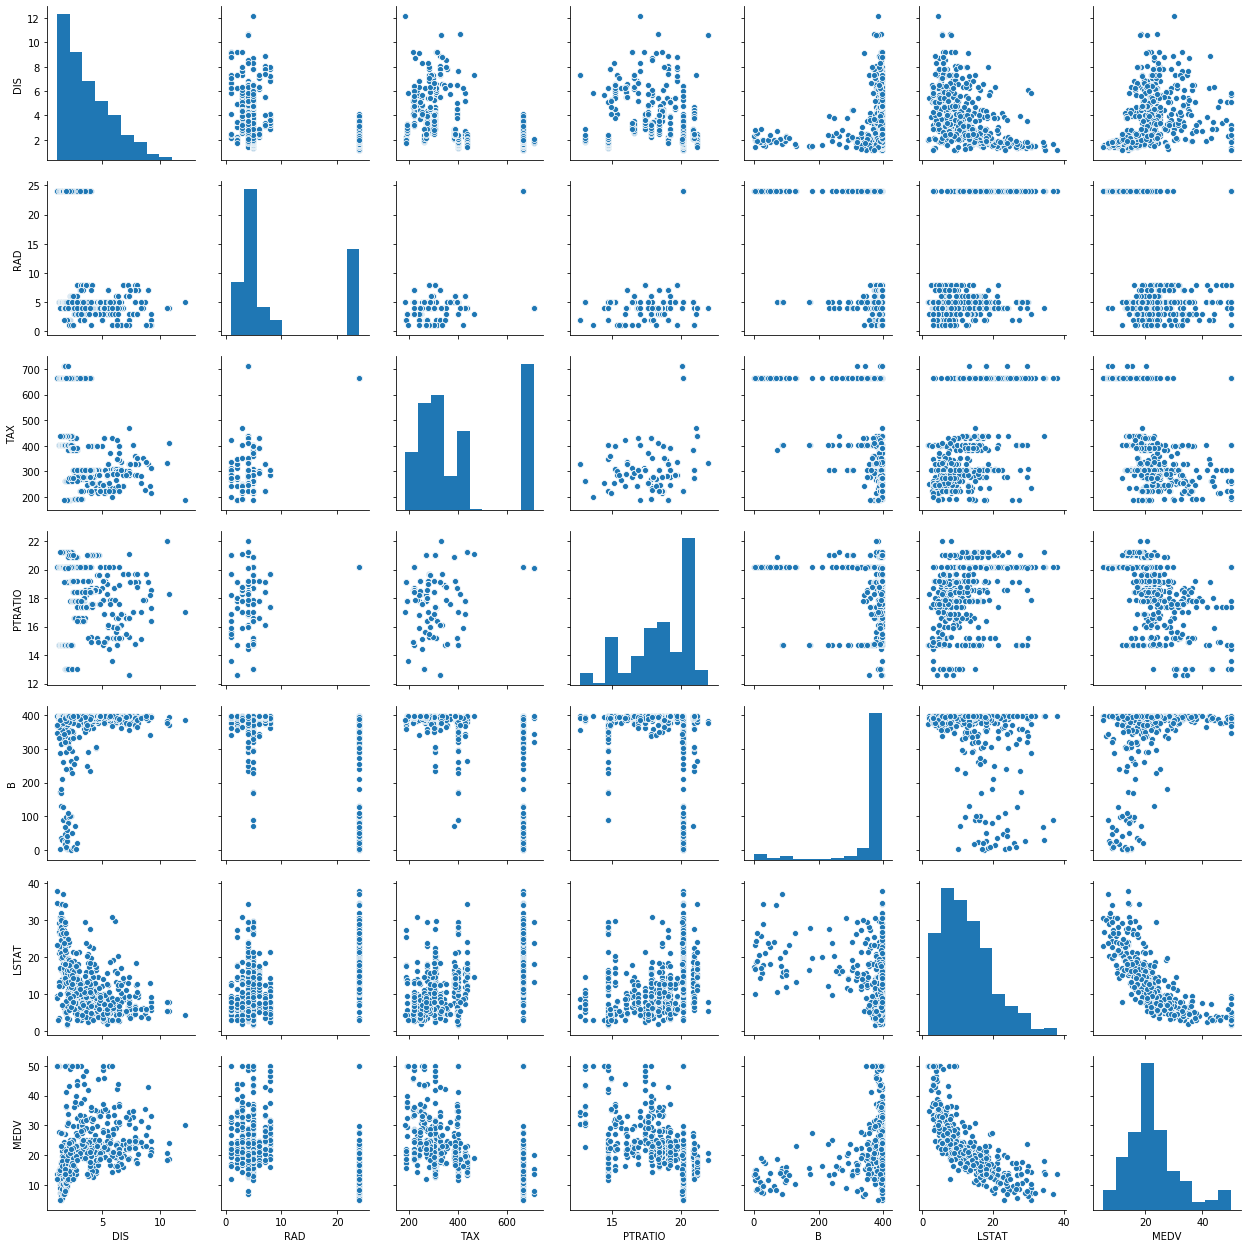

In [31]:
sns.pairplot(data.iloc[:,7:])

In [38]:
data.corr(method = 'spearman')
#максимально коррелирующие с ценой атрибуты LSTAT(отрицательная корреляция) и RM

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
ZN,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
INDUS,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
CHAS,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
NOX,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
RM,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
AGE,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
DIS,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
RAD,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
TAX,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


In [70]:
LSTAT = np.array(data['LSTAT']).reshape(-1,1)
MEDV = np.array(data['MEDV']).reshape(-1,1)

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    LSTAT,
    MEDV,
    test_size = 0.2
)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
predicted_y = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

42.56908126483347
4.826095070646684


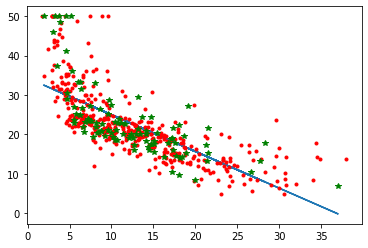

In [69]:
plt.plot(X_test, predicted_y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g*')

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [89]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [93]:
data['Country (region)'].nunique()
#кол-во стран 156

156

In [86]:
#избавимся от строк с пустыми значениями
data = data[~data['Corruption'].isna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           148 non-null object
Ladder                     148 non-null int64
SD of Ladder               148 non-null int64
Positive affect            148 non-null float64
Negative affect            148 non-null float64
Social support             148 non-null float64
Freedom                    148 non-null float64
Corruption                 148 non-null float64
Generosity                 148 non-null float64
Log of GDP
per capita      144 non-null float64
Healthy life
expectancy    142 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.9+ KB


In [88]:
data[['Positive affect', 'Healthy life\nexpectancy']].cov()
#кол-во строк с пустыми значениями 8

,Positive affect,Healthy life\nexpectancy
Positive affect,2033.50524,643.173160
Healthy life\nexpectancy,643.17316,1958.932225


In [95]:
data.corr(method = 'spearman')
#уровень удовлетворенности (Ladder) в первую очередь зависит от Social support, Log of GDP\nper capita и  Healthy life\nexpectancy
#ВВП положительно влияет на уровень соц.поддержки и на продолжительность жизни)
#там, где высокий уровень соц.поддержки, там выше продолжительность жизни

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.539362,0.490725,0.523415,0.818095,0.546170,0.183322,0.496835,0.813175,0.816721
SD of Ladder,0.539362,1.000000,0.086758,0.619700,0.600603,0.252931,0.262841,0.392920,0.628620,0.609305
Positive affect,0.490725,0.086758,1.000000,0.389697,0.386269,0.681770,0.209175,0.354877,0.305312,0.332048
Negative affect,0.523415,0.619700,0.389697,1.000000,0.621888,0.430241,0.160470,0.338226,0.542977,0.488953
Social support,0.818095,0.600603,0.386269,0.621888,1.000000,0.448903,0.118929,0.442432,0.772680,0.740279
Freedom,0.546170,0.252931,0.681770,0.430241,0.448903,1.000000,0.378212,0.489991,0.408801,0.416601
Corruption,0.183322,0.262841,0.209175,0.160470,0.118929,0.378212,1.000000,0.263163,0.187730,0.118324
Generosity,0.496835,0.392920,0.354877,0.338226,0.442432,0.489991,0.263163,1.000000,0.478226,0.428714
Log of GDP\nper capita,0.813175,0.628620,0.305312,0.542977,0.772680,0.408801,0.187730,0.478226,1.000000,0.847366
Healthy life\nexpectancy,0.816721,0.609305,0.332048,0.488953,0.740279,0.416601,0.118324,0.428714,0.847366,1.000000


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

Сколько стран в выборке? Написать ответ. 

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

(array([3., 0., 2., 0., 2., 0., 1., 0., 0., 2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

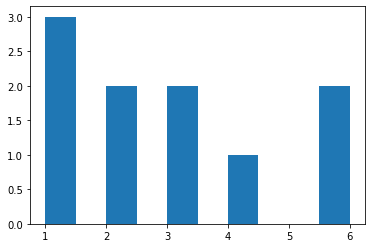

In [181]:
a = pd.Series(np.random.randint(1,7,10))
plt.hist(a)
#рандомное распределение

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

(array([ 2.,  1.,  0.,  1.,  0.,  1.,  3.,  3.,  3.,  1.,  2.,  3.,  4.,
         6.,  5.,  1.,  4.,  8.,  3., 11.,  8.,  7.,  5., 12., 13., 12.,
         7., 14., 19.,  9., 22., 17., 29., 21., 27., 19., 26., 19., 37.,
        11., 37., 17., 32., 34., 31., 19., 30., 20., 24., 18., 31., 25.,
        23., 32., 19., 27., 16., 20., 10., 19.,  8., 19., 12.,  7.,  6.,
         4.,  3.,  6., 10.,  8.,  6.,  5.,  2.,  0.,  2.,  4.,  3.,  0.,
         2.,  2.,  0.,  3.,  3.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([3347.  , 3350.52, 3354.04, 3357.56, 3361.08, 3364.6 , 3368.12,
        3371.64, 3375.16, 3378.68, 3382.2 , 3385.72, 3389.24, 3392.76,
        3396.28, 3399.8 , 3403.32, 3406.84, 3410.36, 3413.88, 3417.4 ,
        3420.92, 3424.44, 3427.96, 3431.48, 3435.  , 3438.52, 3442.04,
        3445.56, 3449.08, 3452.6 , 3456.12, 3459.64, 3463.16, 3466.68,
        3470.2 , 3473.72, 3477.24, 3480.76, 3484.28, 3487.8 , 3491.32,
        

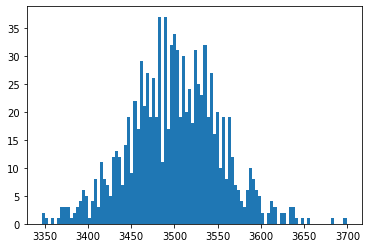

In [215]:
x = []
for i in range(1000):
    x.append(sum(np.random.randint(1,7,1000)))
plt.hist(x, bins = 100)
#График похож на нормальное распределение потому что работает ЦПТ 